In this short demo, we apply regression over the mnist data set and then provide a visualization of the weigths for the different clases in the form of images.

In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from keras.datasets import mnist

Let us load the mnist dataset.

In [2]:
# MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

All we have to do is to instantiate a logistic classifier, and then fit it over the model.

In [3]:
# Turn up tolerance for faster convergence
clf = LogisticRegression(C=0.01,
                         multi_class='multinomial',
                         penalty='l1', solver='saga', tol=0.1)
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)

print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

Sparsity with L1 penalty: 26.05%
Test score with L1 penalty: 0.9237


This is the intersting part of the demo.

Since, for each class, we have a weight for each inout feature, and the input features are pixels, we can depict the weights as images of the same shape of the inputs.

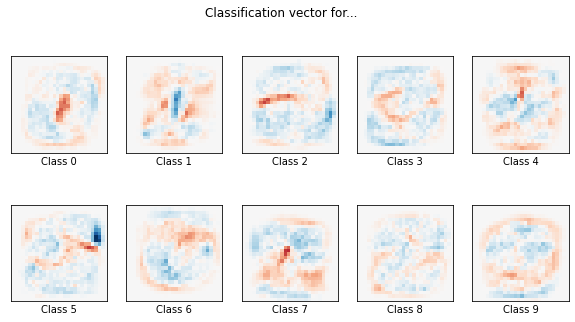

In [4]:
coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')
plt.show()